# Capability — Grounded Q&A
Ask natural-language questions about a scene and receive answers plus bounding boxes for supporting evidence.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericpence/perceptron_repo/blob/main/cookbook/recipes/capabilities/visual-qa/visual-qa.ipynb)

## Install dependencies
Install the SDK and Pillow for inline previews.

In [ ]:
%pip install --upgrade perceptron pillow --quiet

## Configure the Perceptron client
Authenticate once, then load the studio asset for the remaining cells.

In [1]:
from pathlib import Path

from IPython.display import Image as IPyImage
from IPython.display import display
from PIL import Image, ImageDraw

from cookbook.utils import cookbook_asset
from perceptron import configure, question

# configure() reads PERCEPTRON_API_KEY from the environment.
# configure() reads PERCEPTRON_API_KEY from the environment.
configure(
    provider="perceptron",
    # model="isaac-0.1",  # Enable once the SDK supports the model argument.
)

SCENE_PATH = cookbook_asset("capabilities", "qna", "studio_scene.webp")
ANNOTATED_PATH = Path("studio_scene_annotated.png")
if not SCENE_PATH.exists():
    raise FileNotFoundError(f"Missing asset: {SCENE_PATH}")

## Ask a grounded question
Request boxed evidence so the model cites the regions that justify its answer.

In [4]:
QUESTION = "What is the focal point of this scene? Be concise"
qa_result = question(str(SCENE_PATH), QUESTION, expects="box")
print(qa_result.text)
boxes = qa_result.points or []
print(f"Returned {len(boxes)} supporting regions")

The focal point of this scene is the <point_box mention="sailboat"> (353,646) (429,896) </point_box> in the center of the image. It's a white sailboat with a single sail, navigating through a calm bay surrounded by rocky cliffs and a serene landscape. The boat's presence draws the viewer's attention and serves as the main subject of the picturesque coastal scene.
Returned 1 supporting regions


## Visualize supporting evidence
Convert the normalized boxes to pixels and render the overlay.

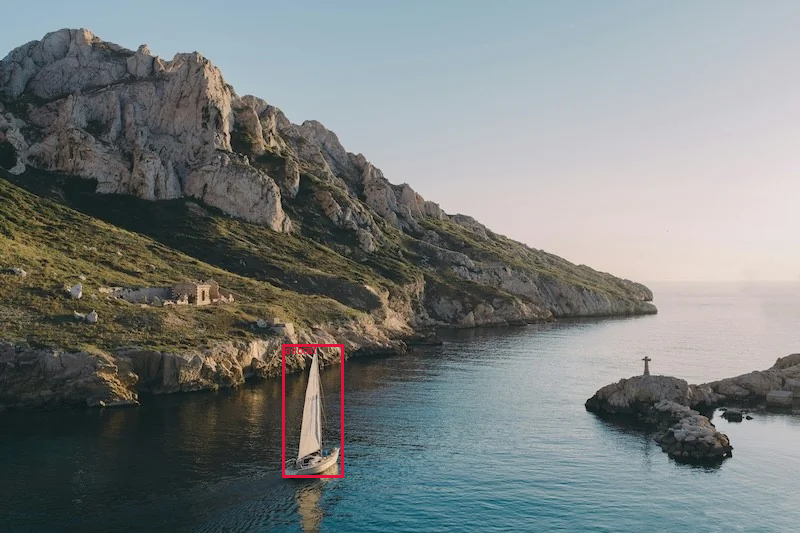

Saved grounded answer to studio_scene_annotated.png


In [5]:
img = Image.open(SCENE_PATH).convert("RGB")
draw = ImageDraw.Draw(img)

if boxes:

    def to_px(point):
        return point.x / 1000 * img.width, point.y / 1000 * img.height

    for box in boxes:
        top_left = to_px(box.top_left)
        bottom_right = to_px(box.bottom_right)
        draw.rectangle([top_left, bottom_right], outline="crimson", width=3)
        label = box.mention or "reference"
        text_x = top_left[0]
        text_y = max(top_left[1] - 18, 0)
        draw.text((text_x, text_y), label, fill="crimson")
else:
    print("No regions returned; adjust the question or expects parameter.")

img.save(ANNOTATED_PATH)
display(IPyImage(filename=str(ANNOTATED_PATH)))
print(f"Saved grounded answer to {ANNOTATED_PATH}")

## Conclusion & next steps
- Tune `QUESTION` toward inspections, instructions, or policy compliance checks.
- Swap `expects` to `"text"` for free-form answers or keep `"box"` / `"point"` for grounded citations.
- Combine Q&A output with detection / OCR results for richer analytics.